## Predictiong Structures with Time Slices

This is a Test which is dedicated to Predicting reinforcing bars with a Segmentation Model.

The following Code is divided into following Chapters
- Chapter 1: creating Train Data
- Chapter 2: Annotation
- Chapter 3: Predicting reinforcing bars with YOLO

### Chapter 1: Creating Training Data

first step is to import the DataToolKit and load the SGY Files and create Dataframes out of them.

In [1]:
#import libraries
import numpy as np
from ultralytics import YOLO

#Setting Working directory
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *




In [2]:
from Pipeline.Datatoolkit import DatatoolKit

dk1 = DatatoolKit(TEST_FILE_DIR , "EG-3D QUER001.SGY")
dk2 = DatatoolKit(TEST_FILE_DIR , "UG3DQUERUNTERZUG.SGY")
file1 = dk1.LoadSGY()
file2 = dk2.LoadSGY()
df1 = dk1.create_df(file1)
df2 = dk2.create_df(file2)

Next tep is to plot a time slice example per file loaded.

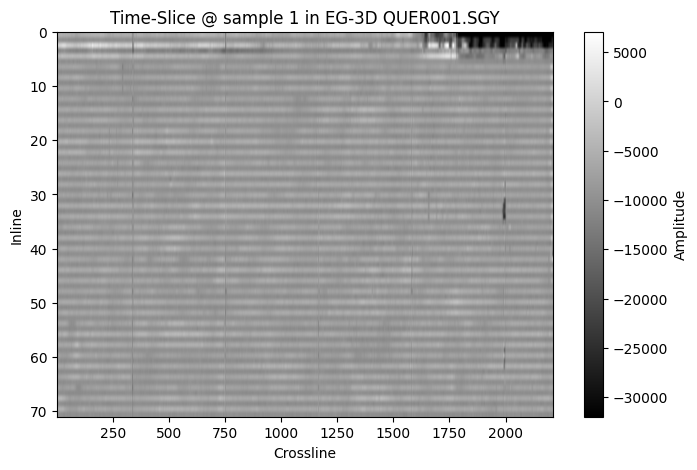

In [4]:
dk1.plot_timeslice_cut_raw(df1, 1)

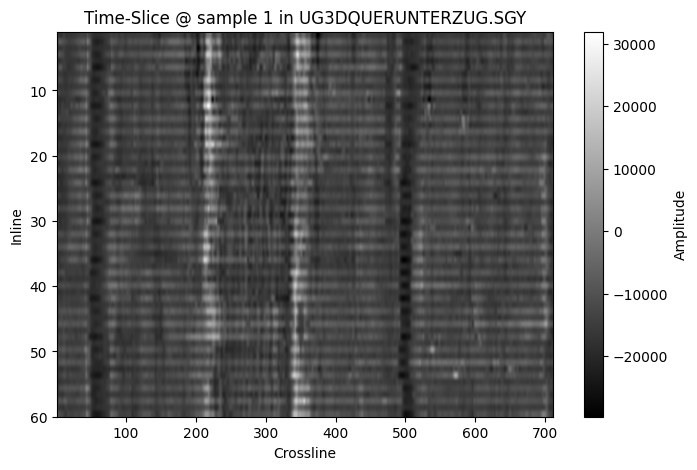

In [5]:
dk2.plot_timeslice_cut_raw(df2,1)

We need later to annotate the Data but at a closer look at the Plots it is shown that the images would not be very useful for annotating by hand with respect to their size. So the next step is to edit the Function from **2 Data_Preprocessing** for creating Images in a way that the size is adjusted so that the images can be more easily annotated.
What is done that 2 Parameters are added one is a Booleian Value for activate the resize option and the Other to set the Scale of Height and width. The Function is already implemented in the DataToolkit and below the function is called with the new changes. The Changes where implemented to all types of cuts.

In [4]:
dk1.create_images(file=file1, df=df1, outdir=TRAIN_DIR, timeslice=True, resize=True, Scale=(10,1))

saved 399 images to c:\pythonad\PAINDHS25\PAINDGPR\Data\train\Pictures\EG-3D QUER001.SGY_timeslice_399.png


In [5]:
dk2.create_images(file=file2, df=df2, outdir=TRAIN_DIR, timeslice=True, resize=True, Scale=(5,1))

saved 399 images to c:\pythonad\PAINDHS25\PAINDGPR\Data\train\Pictures\UG3DQUERUNTERZUG.SGY_timeslice_399.png


In [2]:
model = YOLO(YOLO_MODEL_SEG_RB_DIR)

In [ ]:
results = model.predict()